<a href="https://colab.research.google.com/github/reddypradeep9/django_feedbackform/blob/master/Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [ ]:
!pip install networkx==2.3

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv(r'/content/drive/My Drive/applid/movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [ ]:
edges = [tuple(x) for x in data.values.tolist()]

In [ ]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [ ]:
A = list(nx.connected_component_subgraphs(B))[0]

In [ ]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


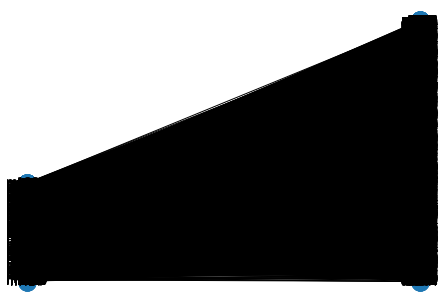

In [ ]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [ ]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [ ]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [ ]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph


(4703, 128)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

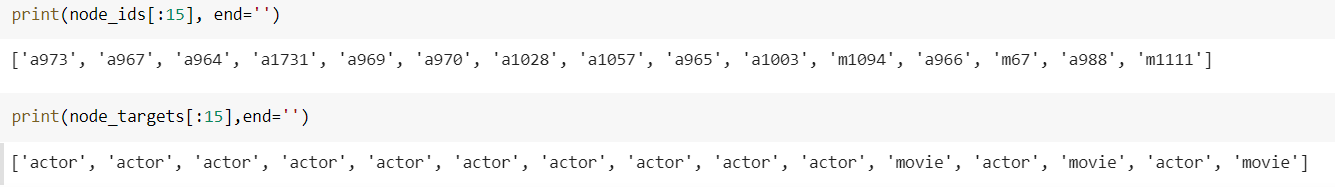

In [ ]:


len(node_ids)

4703

In [ ]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]

    for i in range(len(node_targets)):
      if node_targets[i]=='actor':
        actor_embeddings.append(node_embeddings[i])
      else:
        movie_embeddings.append(node_embeddings[i])
    
    for j in node_ids:

      if 'm' in j:
        movie_nodes.append(j)
      if 'a' in j:
         actor_nodes.append(j)
      

    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [ ]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Graded function - 1</font>

In [ ]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Graded function - 2</font>

In [ ]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [ ]:
def cost1(graph,number_of_clusters):
    
    '''In this function, we will calculate cost1'''
    cost1=0
    cost1+=len(max(nx.connected_components(graph), key=len))/graph.number_of_nodes()
    
    return (1/number_of_clusters)*cost1

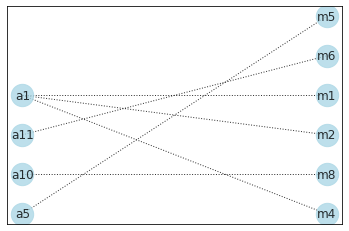

In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Graded function - 3</font>

In [ ]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [ ]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost2=0
    cost2+=sum({i:j for i,j in dict(graph.degree()).items() if 'a' in i}.values())/len([i for i in np.unique(np.array(graph.nodes())) if 'm' in i]) 
    
    return (1/number_of_clusters)*cost2

<font color='cyan'>Graded function - 4</font>

In [ ]:
graded_cost2=cost2(graded_graph,3)
#print(type(graded_cost2))
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

## Task1


In [ ]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(data['actor'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(data['movie'], bipartite=1)
graded_graph.add_edges_from(edges)

In [ ]:
k=[3, 5, 10, 30, 50, 100, 200, 500]
from sklearn.cluster import KMeans
for onek in k:
  km = KMeans(n_clusters=onek)
  km.fit(np.array(actor_embeddings))
  clusternum=km.labels_
  list_clusters=[]
  uniqu=np.unique(clusternum)
  dictofactornodes=dict(zip(actor_nodes,clusternum))

  for i in uniqu:
    cl=[]
    for node,clustnum in dictofactornodes.items():
      if clustnum==i:
        cl.append(node)
    list_clusters.append(cl)

  # cost1=0
  # cost2=0

  for clust in list_clusters:
    G=nx.Graph()
    for acnode in clust:
      sub_graph=nx.ego_graph(graded_graph,acnode)
      G.add_nodes_from(sub_graph.nodes())
      G.add_edges_from(sub_graph.edges())
      c1=cost1(G,onek)
      c2=cost2(G,onek)
  print('cluster number ',onek,'its loss',c1*c2)

cluster number  3 its loss 0.4859762675296655
cluster number  5 its loss 0.10647058823529412
cluster number  10 its loss 0.02942470389170897
cluster number  30 its loss 0.0021653543307086614
cluster number  50 its loss 0.0005663366336633663
cluster number  100 its loss 0.00018627450980392157
cluster number  200 its loss 3.6666666666666666e-05
cluster number  500 its loss 1.8750000000000003e-06


In [ ]:
km = KMeans(n_clusters=3)
km.fit(np.array(actor_embeddings))
clusternum1=km.labels_

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(actor_embeddings)

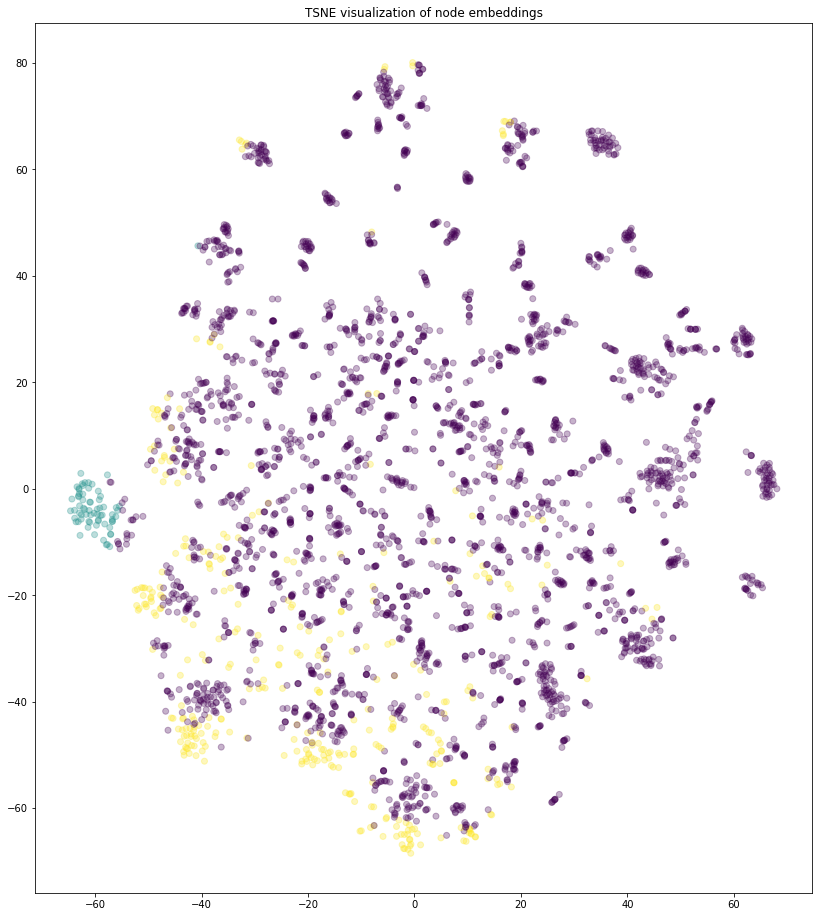

In [ ]:
label_map = { l: i for i, l in enumerate(np.unique(actor_nodes))}
node_colours = [ label_map[target] for target in actor_nodes]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=km.labels_.astype(float), alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()

# Task2


In [ ]:
k=[3, 5, 10, 30, 50, 100, 200, 500]
from sklearn.cluster import KMeans
for onek in k:
  km1 = KMeans(n_clusters=onek)
  km1.fit(np.array(movie_embeddings))
  clusternum1=km1.labels_
  list_clusters1=[]
  uniqu=np.unique(clusternum1)
  dictofmovienodes1=dict(zip(movie_nodes,clusternum1))

  for i in uniqu:
    cl1=[]
    for node,clustnum in dictofmovienodes1.items():
      if clustnum==i:
        cl1.append(node)
    list_clusters1.append(cl1)

  cs1=0
  cs2=0

  for clust1 in list_clusters1:
    G1=nx.Graph()
    for mvnode in clust1:
      sub_graph=nx.ego_graph(graded_graph,mvnode)
      G1.add_nodes_from(sub_graph.nodes())
      G1.add_edges_from(sub_graph.edges())
    cs1+=len(max(nx.connected_components(G1), key=len))/G1.number_of_nodes()
    
    cs2+=sum({i:j for i,j in dict(G1.degree()).items() if 'm' in i}.values())/len([i for i in np.unique(np.array(G1.nodes())) if 'a' in i])
    
  print('cluster number ',onek,'its loss',(1/onek)*(1/onek)*(cs1*cs2))

cluster number  3 its loss 2.8162475726624625
cluster number  5 its loss 2.561892964603595
cluster number  10 its loss 2.567695777353215
cluster number  30 its loss 1.7926749378924423
cluster number  50 its loss 1.8800131502618782
cluster number  100 its loss 1.6099604673214647
cluster number  200 its loss 1.378702299872409
cluster number  500 its loss 1.2094978024745084


In [ ]:
km = KMeans(n_clusters=3)
km.fit(np.array(movie_embeddings))
clusternum1=km.labels_

In [ ]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
node_embeddings_2d = trans.fit_transform(movie_embeddings)

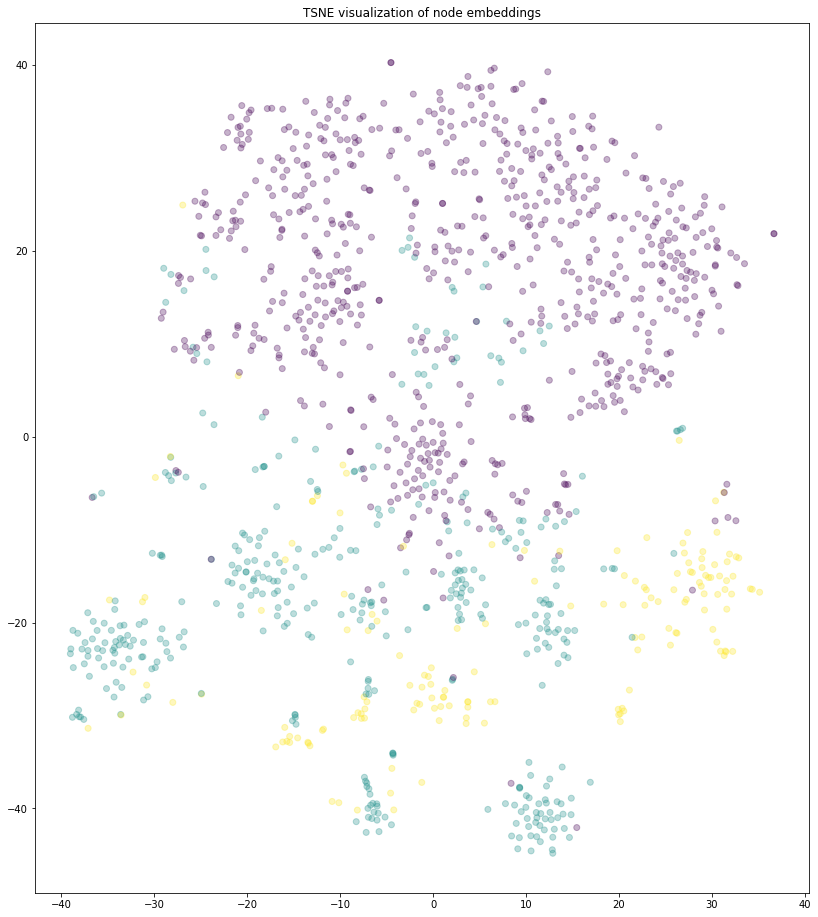

In [ ]:
label_map = { l: i for i, l in enumerate(np.unique(movie_nodes))}
node_colours = [ label_map[target] for target in movie_nodes]

plt.figure(figsize=(20,16))
plt.axes().set(aspect="equal")
plt.scatter(node_embeddings_2d[:,0], 
            node_embeddings_2d[:,1], 
            c=km.labels_.astype(float), alpha=0.3)
plt.title('{} visualization of node embeddings'.format(transform.__name__))

plt.show()